<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Train-test Split and Cross-Validation Lab

_Authors: Joseph Nelson (DC), Kiefer Katovich (SF)_

---

## Review of train/test validation methods

We've discussed overfitting, underfitting, and how to validate the "generalizeability" of your models by testing them on unseen data. 

In this lab you'll practice two related validation methods: 
1. **train/test split**
2. **k-fold cross-validation**

Train/test split and k-fold cross-validation both serve two useful purposes:
- We prevent overfitting by not using all the data, and
- We retain some remaining data to evaluate our model.

In the case of cross-validation, the model fitting and evaluation is performed multiple times on different train/test splits of the data.

Ultimately we can the training and testing validation framework to compare multiple models on the same dataset. This could be comparisons of two linear models, or of completely different models on the same data.


## Instructions

For your independent practice, fit **three different models** on the Boston housing data. For example, you could pick three different subsets of variables, one or more polynomial models, or any other model that you like. 

**Start with train/test split validation:**
* Fix a testing/training split of the data
* Train each of your models on the training data
* Evaluate each of the models on the test data
* Rank the models by how well they score on the testing data set.

**Then try K-Fold cross-validation:**
* Perform a k-fold cross validation and use the cross-validation scores to compare your models. Did this change your rankings?
* Try a few different K-splits of the data for the same models.

If you're interested, try a variety of response variables.  We start with **MEDV** (the `.target` attribute from the dataset load method).

In [29]:
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [24]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/AmesHousing.csv')

HAVE STUDENTS FIND THE ERROR IN THE CODE (IT IS df_x)

In [30]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


### 1. Select 3-4 variables and clean that sub-dataset

In [39]:
df.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [56]:
# Subset 3 variables
new_df = df[['Lot Area', 'Full Bath', 'Garage Area', 'SalePrice']]

In [57]:
new_df.head()

,Lot Area,Full Bath,Garage Area,SalePrice
0,31770,1,528.0,215000
1,11622,1,730.0,105000
2,14267,1,312.0,172000
3,11160,2,522.0,244000
4,13830,2,482.0,189900


In [58]:
new_df.isnull().sum()

Lot Area       0
Full Bath      0
Garage Area    1
SalePrice      0
dtype: int64

In [59]:
# Fill in missing values with median
new_df.fillna(method='ffill', inplace=True)

In [60]:
# Sanity check
new_df.isnull().sum()

Lot Area       0
Full Bath      0
Garage Area    0
SalePrice      0
dtype: int64

### 2. Perform a 50/50 test train split on your sub dataset

- Use sklearn.
- Score and plot your predictions.

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [62]:
feature_cols = ['Lot Area', 'Full Bath', 'Garage Area']

X = new_df[feature_cols]
y = new_df.SalePrice

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=8)

In [64]:
# instantiate
lr = LinearRegression()

# fit
lr.fit(X_train, y_train)

# predict
y_pred = lr.predict(X_test)

In [65]:
error = y_test - y_pred

In [66]:
error

2109    -22242.168676
1687     50808.482894
170      28242.706112
1477    -23969.759383
2286     -6375.570590
1849     22985.346463
2754    -50970.539318
1317     16721.965712
1385      9985.997416
329      16518.544453
1579    -47816.483991
618      22732.973584
2727    -17171.838552
1878    -60660.148897
980       4645.744132
2832    -45987.148711
2717    -62944.441396
151      -2393.947349
338      -4739.078943
1237     15747.530309
733      20006.182389
1405     -4113.130122
2891     87147.274134
1614     33761.460100
1506     28641.378799
820      25099.260255
2131     15934.810056
1229      2576.484775
313    -134364.322270
1341    -36103.851865
1859    -16324.366911
736      17324.254320
2235    -12374.868267
1153      5027.084237
1678    -79146.024671
2401     26030.277867
70       14396.949414
2310     -1919.485208
94      -23515.305672
2101      4020.384482
2601    -51657.892033
426    -115230.501226
2367      8621.751869
2300    -26026.597711
169     -26155.941312
235     -5

In [67]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_test, y_pred))

54291.237067686096

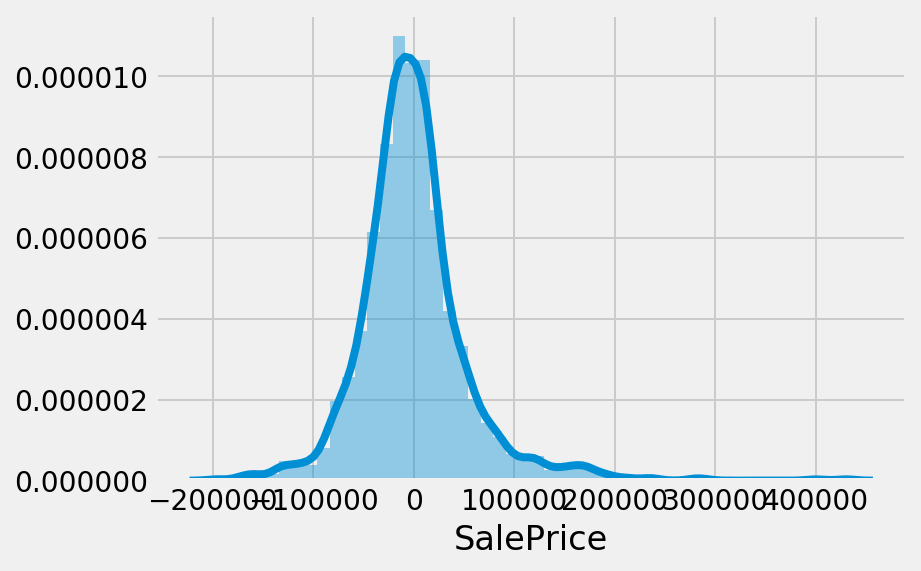

In [68]:
sns.distplot(error)

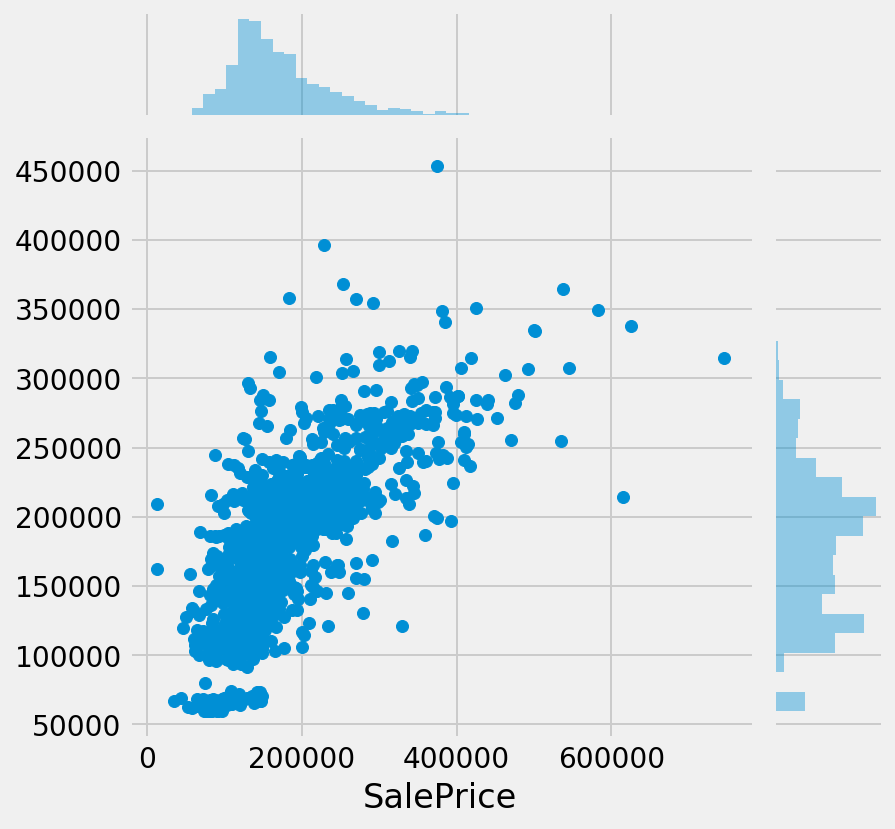

In [69]:
sns.jointplot(y_test, y_pred);

### 3. Try 70/30 and 90/10
- Score and plot.  
- How do your metrics change?

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)


lr2 = LinearRegression()
lr2.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

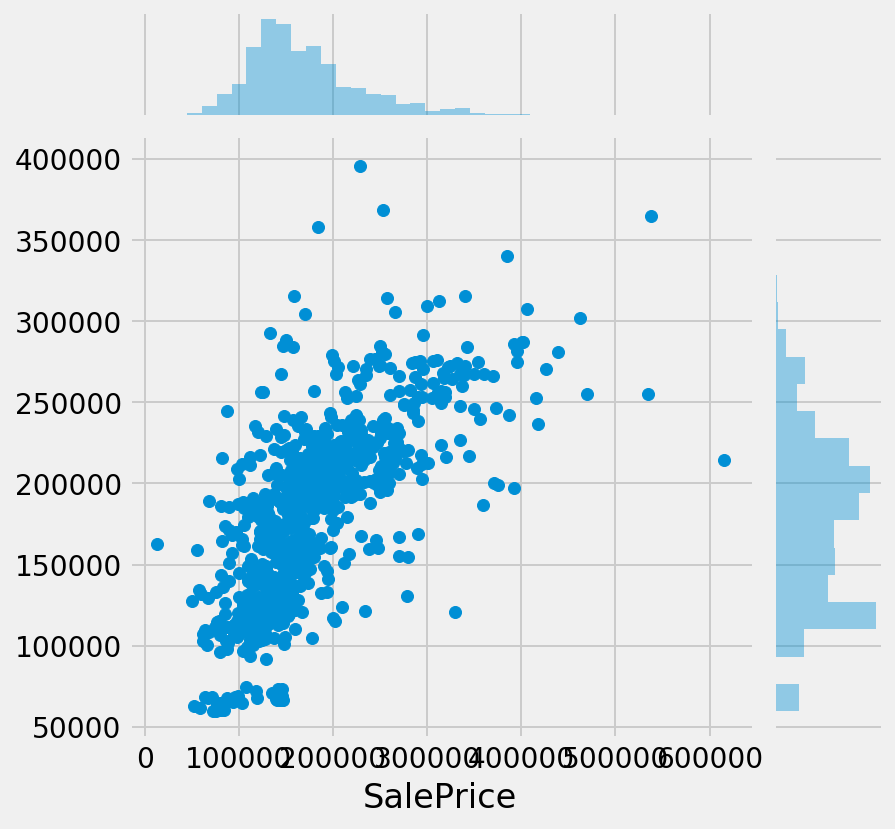

In [71]:
y_pred = lr.predict(X_test)
sns.jointplot(y_test, y_pred);

In [72]:
np.sqrt(mean_squared_error(y_test, y_pred))

52100.94559254075

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=8)


lr2 = LinearRegression()
lr2.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

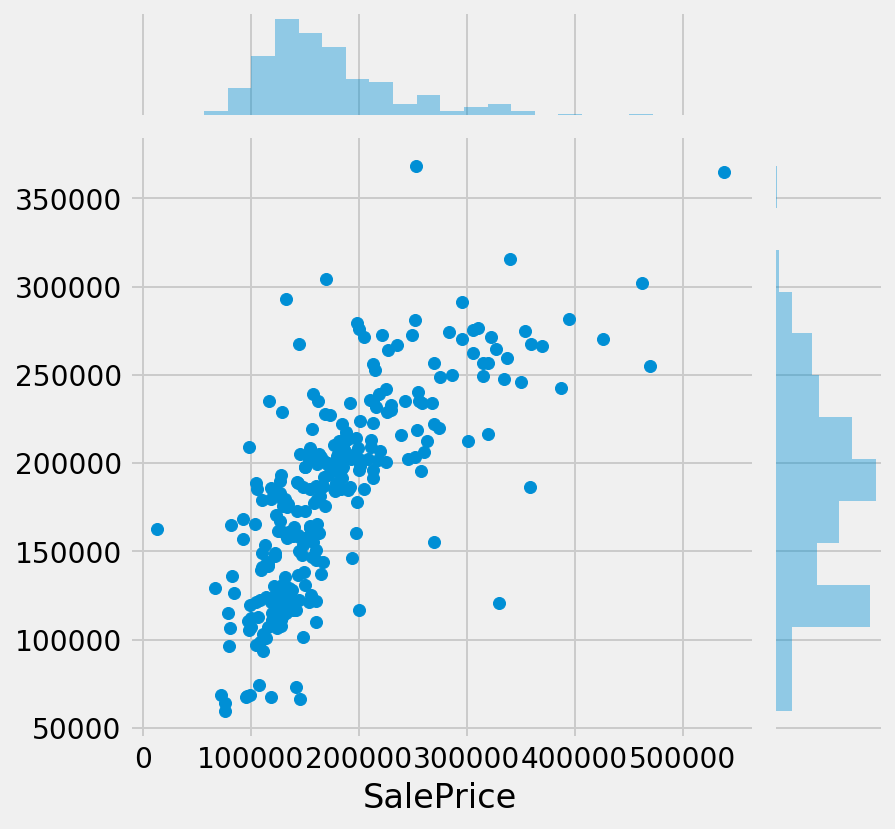

In [74]:
y_pred = lr.predict(X_test)
sns.jointplot(y_test, y_pred);

In [75]:
np.sqrt(mean_squared_error(y_test, y_pred))

50587.18898410266

### 4. Try K-Folds cross-validation with K between 5-10 for your regression. 

- What seems optimal? 
- How do your scores change?  
- What the variance of scores like?
- Try different folds to get a sense of how this impacts your score.

In [76]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

# iterate through folds 5-10
for folds in range(5,11):
    print('------------------------------------\n')
    print('K: {}'.format(folds))
    model = LinearRegression()
    
    # Perform cross-validation
    scores = cross_val_score(model, X, y, cv=folds)
    print("Cross-validated scores: {}".format(scores))
    print("Mean CV R2: {}".format(np.mean(scores)))
    print('Std CV R2: {}'.format(np.std(scores)))
    
    # Make cross-validated predictions
    predictions = cross_val_predict(model, X, y, cv=folds)
    
    r2 = metrics.r2_score(y, predictions)
    print("Cross-Predicted R2: {}".format(r2))


------------------------------------

K: 5
Cross-validated scores: [0.51930993 0.51961082 0.50253717 0.4541916  0.55619712]
Mean CV R2: 0.5103693289189815
Std CV R2: 0.033114366703082466
Cross-Predicted R2: 0.5126852357855152
------------------------------------

K: 6
Cross-validated scores: [0.51422866 0.50770539 0.53578831 0.49405045 0.48758247 0.48093682]
Mean CV R2: 0.5033820164354624
Std CV R2: 0.018380243103539227
Cross-Predicted R2: 0.5122666384524747
------------------------------------

K: 7
Cross-validated scores: [0.48144444 0.55623575 0.51205324 0.39274535 0.55268161 0.49407369
 0.33231626]
Mean CV R2: 0.4745071912721044
Std CV R2: 0.07702943479624856
Cross-Predicted R2: 0.5114411046359792
------------------------------------

K: 8
Cross-validated scores: [0.49607543 0.54223386 0.53912562 0.5013866  0.4701866  0.32715207
 0.49241159 0.3651303 ]
Mean CV R2: 0.4667127577482815
Std CV R2: 0.07372260520176652
Cross-Predicted R2: 0.5105581067460615
------------------------------

HOW CAN WE AUTOMATE THIS PROCESS WITH SKLEARN?

In [77]:
# From link: https://machinelearningmastery.com/k-fold-cross-validation/

# scikit-learn k-fold cross-validation
from numpy import array
from sklearn.model_selection import KFold

# data sample
data = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])

# prepare cross validation
kfold = KFold(3, True, 1)

# enumerate splits
for train, test in kfold.split(data):
    print('train: %s, test: %s' % (data[train], data[test]))


train: [0.1 0.4 0.5 0.6], test: [0.2 0.3]
train: [0.2 0.3 0.4 0.6], test: [0.1 0.5]
train: [0.1 0.2 0.3 0.5], test: [0.4 0.6]


In [78]:
# From documentation https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

diabetes = datasets.load_diabetes()

X = diabetes.data[:150]

y = diabetes.target[:150]

lasso = linear_model.Lasso()

print(cross_val_score(lasso, X, y, cv=3))

[0.33150734 0.08022311 0.03531764]
